In [1]:
import math
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from sklearn.metrics import accuracy_score
TRAIN_DATA_PATH = 'NFT_G_dataset-PTC_training.csv'
TEST_DATA_PATH = 'NFT_G_dataset-PTC_test.csv'
TARGET_NAME = 'Diameter of Bulb(mm)'

In [2]:
# x_train = features, y_train = target
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)
x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

In [3]:
"""
  Standard Scale test and train data
  Z - Score normalization
  """
def scale_datasets(x_train, x_test):
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train),columns=x_train.columns)
    x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test),columns = x_test.columns)
    return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [4]:
hidden_units1 = 160
hidden_units2 = 320
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [5]:
%%time
# loss function
#msle = MeanSquaredLogarithmicError()
msle = MeanSquaredError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=100, 
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100
2/2 [==============================] - 1s 361ms/step - loss: 531.2623 - mean_squared_error: 527.0265 - val_loss: 1125.4889 - val_mean_squared_error: 1125.4889
Epoch 2/100
2/2 [==============================] - 0s 60ms/step - loss: 211.1976 - mean_squared_error: 198.7562 - val_loss: 204.4241 - val_mean_squared_error: 204.4241
Epoch 3/100
2/2 [==============================] - 0s 43ms/step - loss: 286.4031 - mean_squared_error: 263.8471 - val_loss: 187.4659 - val_mean_squared_error: 187.4659
Epoch 4/100
2/2 [==============================] - 0s 49ms/step - loss: 63.0273 - mean_squared_error: 67.7381 - val_loss: 436.2281 - val_mean_squared_error: 436.2281
Epoch 5/100
2/2 [==============================] - 0s 41ms/step - loss: 146.4946 - mean_squared_error: 146.3291 - val_loss: 380.2002 - val_mean_squared_error: 380.2002
Epoch 6/100
2/2 [==============================] - 0s 41ms/step - loss: 122.0711 - mean_squared_error: 121.1108 - val_loss: 190.4695 - val_mean_squared_error: 

2/2 [==============================] - 0s 26ms/step - loss: 3.1587 - mean_squared_error: 3.1067 - val_loss: 221.0670 - val_mean_squared_error: 221.0670
Epoch 51/100
2/2 [==============================] - 0s 26ms/step - loss: 3.7790 - mean_squared_error: 3.8556 - val_loss: 195.8128 - val_mean_squared_error: 195.8128
Epoch 52/100
2/2 [==============================] - 0s 37ms/step - loss: 3.1403 - mean_squared_error: 3.1417 - val_loss: 181.5856 - val_mean_squared_error: 181.5856
Epoch 53/100
2/2 [==============================] - 0s 19ms/step - loss: 4.2412 - mean_squared_error: 4.2831 - val_loss: 200.1382 - val_mean_squared_error: 200.1382
Epoch 54/100
2/2 [==============================] - 0s 58ms/step - loss: 3.8516 - mean_squared_error: 3.9600 - val_loss: 213.8242 - val_mean_squared_error: 213.8242
Epoch 55/100
2/2 [==============================] - 0s 45ms/step - loss: 3.4236 - mean_squared_error: 3.4841 - val_loss: 213.5494 - val_mean_squared_error: 213.5494
Epoch 56/100
2/2 [=====

Epoch 100/100
2/2 [==============================] - 0s 38ms/step - loss: 4.8161 - mean_squared_error: 4.8662 - val_loss: 253.0602 - val_mean_squared_error: 253.0602
CPU times: total: 3.05 s
Wall time: 5.7 s


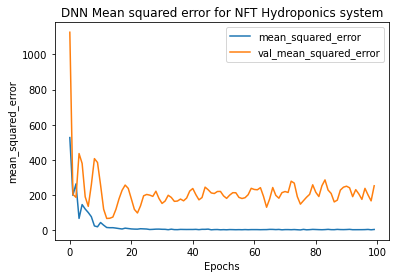

In [6]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.title('DNN Mean squared error for NFT Hydroponics system')
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
#plot_history(history, 'mean_squared_logarithmic_error')
plot_history(history, 'mean_squared_error')

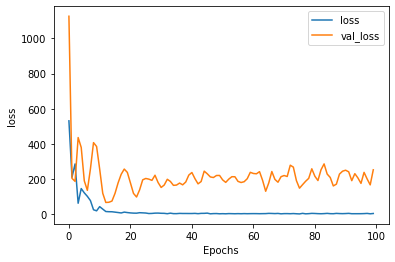

In [7]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
#plot_history(history, 'mean_squared_logarithmic_error')
plot_history(history, 'loss')

In [8]:
#x_test['prediction'] = model.predict(x_test_scaled)
prediction = model.predict(x_test_scaled)

1/1 [==============================] - 0s 120ms/step


In [9]:
prediction.shape

(18, 1)

In [10]:
model.

SyntaxError: invalid syntax (1068564517.py, line 1)